In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

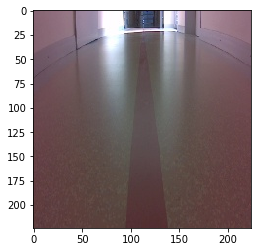

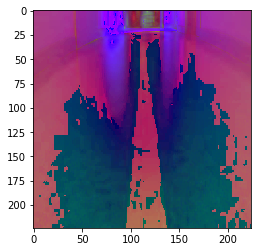

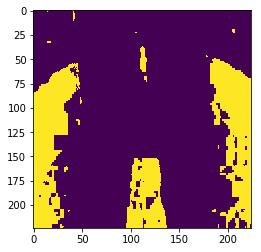

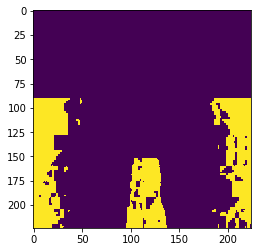

(224, 224)

In [17]:
img = cv2.imread('road_following_r_line/apex/110_60_8d1ea5c0-87d8-11eb-9cc4-a0a4c55ef385.jpg',1)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv)
plt.show()

#lower_orange = np.array([0, 50,100])
#upper_orange = np.array([60,255, 255])
lower_red = np.array([170, 50,0])
upper_red = np.array([180, 255, 255])

mask = cv2.inRange(hsv, lower_red, upper_red)
plt.imshow(mask)
plt.show()
mask[0:90,0:224]=0
plt.imshow(mask)
plt.show()

# APPLY PROCESS TO FOLDER 

In [ ]:
data_dir='road_following_r_line'
dir_target='road_following_colorIsolation'

import os 
from color_isolation import colorIsolationTransform

os.chdir("/home/jetson/jetracer/notebooks")
num=600


if not os.path.exists(dir_target) :
    os.mkdir(dir_target)
    os.mkdir(dir_target+"/apex")
    while not os.path.exists(dir_target):
        pass
    print(dir_target," create")
else :
    print(dir_target," already exists")
    
liste_cate = os.listdir(data_dir+'/apex')
    

for a in range(0,len(liste_cate)): 
    path=data_dir+'/apex/'+liste_cate[a]
    items=[]
    if path.endswith(".jpg"):
        items = path.split('_')
        itemss=items[3].split('/')
        img=colorIsolationTransform(path,'red')
        cv2.imwrite(dir_target+'/apex/'+str(itemss[2])+'_'+str(items[4])+'_ColorIsolation'+str(num)+'.jpg', img)
        num+=1
        #print('Time:{}'.format(timetot))

print("image processed and copy in ", dir_target+"/apex")

    
    


In [3]:
# Import the os module
import os

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

# Change the current working directory
#os.chdir('road_following_test_TRAIN')


Current working directory: /home/jetson/jetracer/notebooks
Current working directory: /home/jetson/jetracer/notebooks


# Filter black image

In [65]:
nbpixelsnoir=0
totpixel=224*224*3
imgnb = cv2.imread('road_following_colorIsolation/apex/105_140_ColorIsolation16.jpg',1)
nbpixelnoir=np.sum(imgnb==0)
percentage=nbpixelnoir/totpixel
print("%black pixels:",percentage)


%black pixels: 0.9115114795918368


In [19]:
import os 
import cv2
import numpy as np
data_dir='road_following_colorIsolation'
nbrm=0
totpixel=224*224*3

liste_cate = os.listdir(data_dir+'/apex')


for a in range(0,len(liste_cate)): 
    path=data_dir+'/apex/'+liste_cate[a]
    if path.endswith(".jpg"):
        nbpixelnoir=0
        imgnb = cv2.imread(path,1)
        nbpixelnoir=np.sum(imgnb==0)
        percentage=nbpixelnoir/totpixel
        if percentage > 0.94:
            os.remove(path)
            print(percentage)
            print(path," removed")
            nbrm+=1
print(nbrm)




0
